In [1]:
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from __future__ import division
from nltk.corpus import inaugural
import numpy as np
#import pandas as pd
import operator
from sklearn.preprocessing import normalize
import plotly
plotly.tools.set_credentials_file(username='karlinjzn', api_key='KaiNcWK0oQ994SUKEiSo')

import plotly.plotly as py
import plotly.graph_objs as go
#from readability_score.calculators.fleschkincaid import *
#from readability_score.calculators.dalechall import *

#from __future__ import print_function

%matplotlib inline

In [2]:
import os  
from nltk.parse import stanford  
  
#添加stanford环境变量,此处需要手动修改，jar包地址为绝对地址。  
os.environ['STANFORD_PARSER'] = '/Users/zhuonijie/Desktop/stanford-parser-full-2018-02-27/stanford-parser.jar'  
os.environ['STANFORD_MODELS'] = '/Users/zhuonijie/Desktop/stanford-parser-full-2018-02-27/stanford-parser-3.9.1-models.jar'  
  
  
#为JAVAHOME添加环境变量  
java_path = "/Library/Java/JavaVirtualMachines/jdk1.8.0_112.jdk/Contents/Home/bin/java.exe"  
os.environ['JAVAHOME'] = java_path  

In [6]:
from nltk.parse.stanford import StanfordDependencyParser

eng_parser = StanfordDependencyParser(model_path=u'edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz')
res = list(eng_parser.parse("the quick brown fox jumps over the lazy dog".split()))
for row in res[0].triples():
    print row

((u'fox', u'NN'), u'det', (u'the', u'DT'))
((u'fox', u'NN'), u'amod', (u'quick', u'JJ'))
((u'fox', u'NN'), u'amod', (u'brown', u'JJ'))
((u'fox', u'NN'), u'dep', (u'jumps', u'NNS'))
((u'jumps', u'NNS'), u'nmod', (u'dog', u'NN'))
((u'dog', u'NN'), u'case', (u'over', u'IN'))
((u'dog', u'NN'), u'det', (u'the', u'DT'))
((u'dog', u'NN'), u'amod', (u'lazy', u'JJ'))


# Function word frequency

In [2]:
with open("fwlist.txt",'rU') as f:
    content = f.readlines()

fwlist = [x.strip() for x in content] 

In [3]:
fwlist

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'be',
 'became',
 'because',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'but',
 'by',
 'can',
 'cannot',
 'could',
 'dare',
 'despite',
 'did',
 'do',
 'does',
 'done',
 'down',
 'during',
 'each',
 'eg',
 'either',
 'else',
 'elsewhere',
 'enough',
 'etc',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'first',
 'for',
 'former',
 'formerly',
 'from',
 'further',
 'furthermore',
 'had',
 'has',
 'have',
 'he',
 'hence',
 'her',
 'here',
 'hereabouts',
 'hereafter',
 'hereby',
 'herein',
 'hereinafter',
 'heretofore',
 'hereunder',
 

most common words with/without stopwords

In [4]:
words = re.findall(r'\w+', open("conf_mobicom_LorchS96.txt",'rU').read().lower())
Counter(words).most_common(10)

[('the', 531),
 ('of', 240),
 ('to', 233),
 ('is', 183),
 ('and', 161),
 ('a', 149),
 ('that', 148),
 ('in', 145),
 ('strategy', 123),
 ('we', 116)]

In [5]:
filtered_words = [word for word in words if word not in stopwords.words('english')]

In [6]:
Counter(filtered_words).most_common(10)

[('strategy', 123),
 ('time', 87),
 ('process', 83),
 ('processor', 76),
 ('energy', 64),
 ('technique', 61),
 ('sleep', 58),
 ('power', 55),
 ('performance', 54),
 ('savings', 48)]

In [7]:
with open("conf_mobicom_LorchS96.txt",'rU') as f:
    paper = f.read()

words = paper.split()
fw = fwlist
wordfreq = {}
for w in fw:
    wordfreq[w]=words.count(w)
        

lst = [(wordfreq[w],w) for w in wordfreq]
lst.sort()
lst.reverse()

stop_words = set(stopwords.words('english')) # creating a set makes the searching faster

print ([word for word in lst if word not in stop_words])

[(488, 'the'), (240, 'of'), (224, 'to'), (182, 'is'), (158, 'and'), (143, 'a'), (140, 'that'), (118, 'in'), (89, 'it'), (83, 'for'), (80, 'we'), (69, 'by'), (67, 'be'), (54, 'when'), (54, 'this'), (47, 'are'), (46, 'not'), (43, 'or'), (39, 'with'), (39, 'as'), (36, 'on'), (33, 'have'), (32, 'from'), (27, 'will'), (25, 'an'), (24, 'would'), (24, 'which'), (24, 'than'), (24, 'our'), (24, 'has'), (22, 'these'), (22, 'only'), (20, 'since'), (20, 'no'), (19, 'off'), (19, 'even'), (19, 'can'), (19, 'at'), (18, 'more'), (17, 'some'), (17, 'any'), (16, 'other'), (15, 'used'), (15, 'if'), (14, 'so'), (14, 'less'), (14, 'does'), (14, 'all'), (13, 'they'), (12, 'was'), (12, 'each'), (12, 'between'), (12, 'about'), (11, 'such'), (11, 'one'), (11, 'much'), (11, 'its'), (10, 'there'), (10, 'do'), (10, 'but'), (10, 'also'), (9, 'thus'), (9, 'their'), (9, 'often'), (9, 'may'), (9, 'during'), (8, 'while'), (8, 'what'), (8, 'were'), (8, 'still'), (8, 'should'), (8, 'same'), (8, 'never'), (8, 'instead'),

In [11]:
with open("/Users/zhuonijie/Desktop/nlp project/conf_hotos_AbadiBMWX13.txt",'rU') as f:
    paper2 = f.read()

# Sentences, characters, words

In [9]:
# Program will count the characters in text file
tokenized_paper = nltk.sent_tokenize(paper)

num_chars = len(paper)

tnum_sentences = len(tokenized_paper)
word_tok = nltk.word_tokenize(paper)
NoWord = [',','(',')',':',';','.','%','\x96','{','}','[',']','!','?',"''","``"]
word_tok2 = [i for i in word_tok if i not in NoWord]
nw = len(word_tok2)

# Program will count the lines in the text file
num_sentences = paper.count('.')

print('Your input file has characters: '+str(num_chars))
print('Your input file has sentences: '+str(num_sentences))
print "Your paper has tokenized sentences: "+str(tnum_sentences)
print "Your paper has tokenized words: "+str(nw)
print "Your paper has average words per sentence: "+str(nw/tnum_sentences)

Your input file has characters: 47487
Your input file has sentences: 372
Your paper has tokenized sentences: 300
Your paper has tokenized words: 7840
Your paper has average words per sentence: 26.1333333333


In [10]:
# the average word length
np.mean([len(char) for char in word_tok2])

4.943112244897959

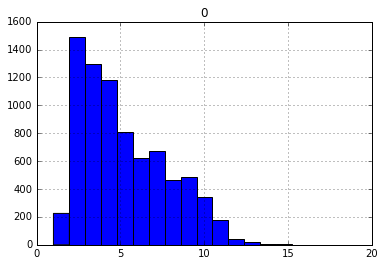

In [11]:
dfh = pd.DataFrame([len(char) for char in word_tok2])
dfh.hist(bins = 20);

In [12]:
dirpath = '/Users/zhuonijie/Desktop/nlp project'
folder = nltk.data.find(dirpath)
#corpusReader = nltk.corpus.PlaintextCorpusReader(folder, '.*\.txt')
corpusReader = nltk.corpus.PlaintextCorpusReader(folder, 'conf_mobicom_LorchS96.txt')

print "The number of sentences =", len(corpusReader.sents())
#print "The number of paragraphs =", len(corpusReader.paras())
print "The number of words =", len([word for sentence in corpusReader.sents() for word in sentence])
print "The number of characters =", len([char for sentence in corpusReader.sents() for word in sentence for char in word])
print "The average word lengths =", len([char for sentence in corpusReader.sents() for word in sentence for char in word])/len([word for sentence in corpusReader.sents() for word in sentence])

The number of sentences = 300
The number of words = 8916
The number of characters = 39629
The average word lengths = 4.44470614625


In [13]:
total_lens = 0
for i, sent in enumerate(corpusReader.sents()):
     total_lens += len(sent)

avg_sent_len = total_lens / i
avg_sent_len

29.819397993311036

In [14]:
sum(len(sent) for sent in corpusReader.sents()) / len(corpusReader.sents())

29.72

In [15]:
fdist = nltk.FreqDist([len(s) for s in corpusReader.sents()])
fdist.items()

[(129, 1),
 (6, 1),
 (7, 3),
 (8, 4),
 (9, 1),
 (10, 6),
 (11, 2),
 (12, 7),
 (13, 4),
 (14, 5),
 (15, 9),
 (16, 8),
 (17, 7),
 (18, 3),
 (19, 14),
 (20, 6),
 (21, 4),
 (22, 15),
 (23, 12),
 (24, 9),
 (25, 13),
 (26, 9),
 (27, 7),
 (28, 8),
 (29, 9),
 (30, 11),
 (31, 13),
 (32, 5),
 (33, 12),
 (34, 7),
 (35, 8),
 (36, 5),
 (37, 2),
 (38, 6),
 (39, 5),
 (40, 3),
 (41, 3),
 (42, 7),
 (43, 6),
 (44, 4),
 (45, 3),
 (46, 2),
 (49, 4),
 (50, 6),
 (51, 3),
 (52, 3),
 (53, 2),
 (54, 1),
 (57, 3),
 (58, 1),
 (59, 1),
 (61, 1),
 (64, 1),
 (71, 2),
 (86, 1),
 (87, 1),
 (95, 1)]

In [16]:
fdist.max()

22

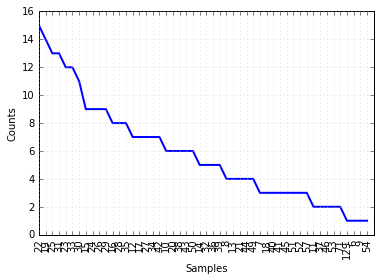

In [17]:
fdist.plot(50, cumulative=False)

# Part of Speech

In [18]:
text = nltk.word_tokenize(paper)
text_tagged = nltk.pos_tag(text)

In [19]:
text2 = nltk.word_tokenize(paper2)
text2_tagged = nltk.pos_tag(text2)

In [20]:
n = 2 # n-gram
taglist = []
output = {}
for item in text_tagged: 
    taglist.append(item[1])
for i in xrange(len(taglist)-n+1):
    g = ' '.join(taglist[i:i+n])
    output.setdefault(g,0)
    output[g] += 1

In [21]:
n = 2 # n-gram
taglist2 = []
output2 = {}
for item in text2_tagged: 
    taglist2.append(item[1])
for i in xrange(len(taglist2)-n+1):
    g = ' '.join(taglist2[i:i+n])
    output2.setdefault(g,0)
    output2[g] += 1

In [22]:
output

{'# CD': 1,
 "'' CC": 1,
 "'' DT": 1,
 "'' IN": 1,
 "'' NN": 2,
 "'' NNP": 1,
 ", ''": 2,
 ', CC': 62,
 ', CD': 9,
 ', DT': 66,
 ', EX': 3,
 ', IN': 78,
 ', JJ': 15,
 ', JJS': 1,
 ', MD': 4,
 ', NN': 20,
 ', NNP': 31,
 ', NNS': 4,
 ', PRP': 51,
 ', PRP$': 2,
 ', RB': 32,
 ', TO': 5,
 ', VB': 4,
 ', VBD': 1,
 ', VBG': 26,
 ', VBN': 11,
 ', VBP': 2,
 ', VBZ': 16,
 ', WDT': 5,
 ', WRB': 3,
 ', ``': 1,
 ". ''": 2,
 '. CC': 3,
 '. CD': 3,
 '. DT': 78,
 '. EX': 2,
 '. IN': 43,
 '. JJ': 14,
 '. JJS': 1,
 '. NN': 21,
 '. NNP': 26,
 '. NNS': 6,
 '. PDT': 1,
 '. PRP': 40,
 '. PRP$': 2,
 '. RB': 33,
 '. TO': 7,
 '. VB': 2,
 '. VBG': 11,
 '. VBN': 1,
 '. WRB': 3,
 ': :': 3,
 ': CC': 1,
 ': DT': 7,
 ': IN': 5,
 ': JJ': 3,
 ': NN': 6,
 ': PRP': 4,
 ': PRP$': 3,
 ': RB': 3,
 ': VB': 1,
 ': VBZ': 1,
 ': WP': 1,
 ': WRB': 1,
 'CC ,': 3,
 'CC :': 1,
 'CC CD': 5,
 'CC DT': 30,
 'CC IN': 22,
 'CC JJ': 14,
 'CC JJR': 2,
 'CC MD': 3,
 'CC NN': 27,
 'CC NNP': 23,
 'CC NNS': 7,
 'CC PRP': 2,
 'CC PRP$': 2,
 '

In [23]:
print len(output)
print len(output2)

513
437


In [24]:
common_output = {key:output[key] for key in output if key in output2}
common_output2 = {key:output2[key] for key in output2 if key in common_output}

In [25]:
print len(common_output)
print len(common_output2)

356
356


In [55]:
filtered_output = {i:output[i] for i in output if output[i] >= 20}
filtered_output2 = {i:output2[i] for i in output2 if output2[i] >= 20}

print len(filtered_output)
print len(filtered_output2)

f_common_output = {key:filtered_output[key] for key in filtered_output if key in filtered_output2}
f_common_output2 = {key:filtered_output2[key] for key in filtered_output2 if key in filtered_common_output}

print len(f_common_output)
print len(f_common_output2)

104
47
45
45


In [28]:
sorted_output = sorted(output.items(), key=lambda x: x[1], reverse=True)

In [29]:
sorted_output

[('DT NN', 483),
 ('IN DT', 384),
 ('NN IN', 345),
 ('JJ NN', 331),
 ('NN NN', 312),
 ('DT JJ', 234),
 ('NN ,', 178),
 ('NN .', 151),
 ('TO VB', 148),
 ('NN VBZ', 142),
 ('IN NN', 142),
 ('NNS IN', 114),
 ('VBN IN', 103),
 ('NN NNS', 90),
 ('PRP VBP', 81),
 ('DT NNS', 80),
 (', IN', 78),
 ('. DT', 78),
 ('CD NN', 76),
 ('MD VB', 76),
 ('JJ NNS', 74),
 ('VB DT', 74),
 ('IN CD', 69),
 ('PRP VBZ', 69),
 ('NNP ,', 66),
 (', DT', 66),
 ('IN JJ', 65),
 ('VBZ RB', 62),
 ('VBG DT', 62),
 (', CC', 62),
 ('NNP NNP', 56),
 ('NNS ,', 55),
 ('NN CC', 54),
 ('VBZ VBN', 54),
 ('IN PRP', 53),
 ('IN VBG', 53),
 ('VBZ DT', 52),
 ('RB ,', 51),
 ('NN TO', 51),
 (', PRP', 51),
 ('NN NNP', 49),
 ('DT NNP', 49),
 ('RB IN', 46),
 ('NNP NN', 43),
 ('. IN', 43),
 ('VBZ JJ', 41),
 ('IN NNP', 41),
 ('RB VB', 40),
 ('. PRP', 40),
 ('NNS .', 39),
 ('VBZ IN', 36),
 ('NNS VBP', 36),
 ('VB VBN', 36),
 ('IN NNS', 35),
 ('NN MD', 34),
 ('JJ JJ', 33),
 ('. RB', 33),
 ('JJ TO', 33),
 ('VBP VBN', 33),
 ('NN VBN', 32),
 ('N

In [30]:
sorted_output2 = sorted(output2.items(), key=lambda x: x[1], reverse=True)

In [31]:
y = []
for f in range(20):
    y.append(sorted_output[f][1])

In [32]:
y2 = []
for f in range(20):
    y2.append(sorted_output2[f][1])

In [33]:
tag_fd = nltk.FreqDist(tag for (word, tag) in text_tagged)
tag_fd.most_common()

[('NN', 1625),
 ('IN', 1009),
 ('DT', 933),
 ('JJ', 599),
 (',', 454),
 ('NNS', 400),
 ('VBZ', 367),
 ('RB', 367),
 ('NNP', 322),
 ('.', 300),
 ('VB', 299),
 ('PRP', 241),
 ('VBN', 240),
 ('TO', 232),
 ('VBG', 221),
 ('CC', 221),
 ('CD', 180),
 ('VBP', 167),
 ('MD', 100),
 ('VBD', 90),
 ('WRB', 73),
 ('PRP$', 47),
 ('WDT', 44),
 (':', 39),
 ('JJR', 34),
 ('RP', 26),
 ('RBR', 20),
 ('JJS', 14),
 ('EX', 12),
 ('WP', 9),
 ('``', 6),
 ("''", 6),
 ('POS', 5),
 ('PDT', 4),
 ('RBS', 4),
 ('WP$', 2),
 ('NNPS', 2),
 ('#', 1)]

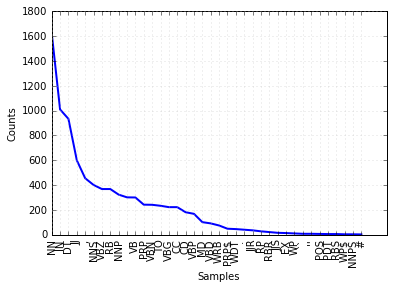

In [34]:
tag_fd.plot(cumulative=False)

In [43]:
y1 = [float(i)/sum(common_output.values()) for i in common_output.values()]
y2 = [float(i)/sum(common_output2.values()) for i in common_output2.values()]

In [44]:
trace0 = go.Scatter(
    x = range(len(common_output.values())),
    y = y1,
    name='paper 1',
    mode='markers',
    marker=dict(
        size=y1,
        sizemode='area',
        sizeref=2.*max(y1)/(40.**2),
        sizemin=4,
    )
)

trace1 = go.Scatter(
    x = range(len(common_output2.values())),
    y = y2,
    name='paper 2',
    mode='markers',
    marker=dict(
        size=y2,
        sizemode='area',
        sizeref=2.*max(y2)/(40.**2),
        sizemin=4,
    )
)

data = [trace0,trace1]
py.iplot(data, filename='PoS comparison')

In [56]:
y1 = [float(i)/sum(f_common_output.values()) for i in f_common_output.values()]
y2 = [float(i)/sum(f_common_output2.values()) for i in f_common_output2.values()]

In [57]:
trace0 = go.Scatter(
    x = range(len(f_common_output.values())),
    y = y1,
    name='paper 1',
    mode='markers',
    marker=dict(
        size=y1,
        sizemode='area',
        sizeref=2.*max(y1)/(40.**2),
        sizemin=4,
    )
)

trace1 = go.Scatter(
    x = range(len(f_common_output2.values())),
    y = y2,
    name='paper 2',
    mode='markers',
    marker=dict(
        size=y2,
        sizemode='area',
        sizeref=2.*max(y2)/(40.**2),
        sizemin=4,
    )
)

data = [trace0,trace1]
py.iplot(data, filename='PoS comparison')

# Readability Calculation

In [4]:
fk = FleschKincaid(open('/Users/zhuonijie/Desktop/nlp project/conf_hotos_AbadiBMWX13.txt').read(), locale='nl_NL')
dc = DaleChall(open( '/Users/zhuonijie/Desktop/nlp project/conf_hotos_AbadiBMWX13.txt' ).read(), locale='de_DE')

print(fk.min_age)
print(dc.min_age)

18
31


In [5]:
fk = FleschKincaid(open('/Users/zhuonijie/Desktop/nlp project/conf_mobicom_LorchS96.txt').read(), locale='nl_NL')
dc = DaleChall(open( '/Users/zhuonijie/Desktop/nlp project/conf_mobicom_LorchS96.txt' ).read(), locale='de_DE')

print(fk.min_age)
print(dc.min_age)

20
32


# Passive Voice Detector

In [17]:
res = list(eng_parser.parse("the quick brown fox jumps over the lazy dog".split()))
for row in res[0].triples():
    print row

((u'fox', u'NN'), u'det', (u'the', u'DT'))
((u'fox', u'NN'), u'amod', (u'quick', u'JJ'))
((u'fox', u'NN'), u'amod', (u'brown', u'JJ'))
((u'fox', u'NN'), u'dep', (u'jumps', u'NNS'))
((u'jumps', u'NNS'), u'nmod', (u'dog', u'NN'))
((u'dog', u'NN'), u'case', (u'over', u'IN'))
((u'dog', u'NN'), u'det', (u'the', u'DT'))
((u'dog', u'NN'), u'amod', (u'lazy', u'JJ'))


In [19]:
import nltk  
import nltk.data  
  
def splitSentence(paragraph):  
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')  
    sentences = tokenizer.tokenize(paragraph)  
    return sentences  
  
if __name__ == '__main__':  
    print splitSentence("My name is Tom. I am a boy. I like soccer!")  

['My name is Tom.', 'I am a boy.', 'I like soccer!']


In [21]:
sentences = splitSentence(paper2)

In [22]:
sentences[3]

'Unfortunately several incidents in the last few years have proved that this trust is misplaced .'

In [23]:
res = list(eng_parser.parse(sentences[3].split()))
for row in res[0].triples():
    print row

((u'proved', u'VBN'), u'advmod', (u'Unfortunately', u'RB'))
((u'proved', u'VBN'), u'nsubj', (u'incidents', u'NNS'))
((u'incidents', u'NNS'), u'amod', (u'several', u'JJ'))
((u'incidents', u'NNS'), u'nmod', (u'years', u'NNS'))
((u'years', u'NNS'), u'case', (u'in', u'IN'))
((u'years', u'NNS'), u'det', (u'the', u'DT'))
((u'years', u'NNS'), u'amod', (u'last', u'JJ'))
((u'years', u'NNS'), u'amod', (u'few', u'JJ'))
((u'proved', u'VBN'), u'aux', (u'have', u'VBP'))
((u'proved', u'VBN'), u'ccomp', (u'misplaced', u'VBN'))
((u'misplaced', u'VBN'), u'mark', (u'that', u'IN'))
((u'misplaced', u'VBN'), u'nsubjpass', (u'trust', u'NN'))
((u'trust', u'NN'), u'det', (u'this', u'DT'))
((u'misplaced', u'VBN'), u'auxpass', (u'is', u'VBZ'))


# Diversity

In [2]:
import nltk #自然语言处理
import re #正则
from colorama import Fore,Back,Style #改变终端输出字体和颜色

In [3]:
ex_sent = "I have a pen and a pencil. But I don't want the pen, I just want a pencil."
sp_sent = nltk.word_tokenize(ex_sent) #分词

wo = 'pen'

if wo in sp_sent: #判断单词是否在句子中
    print(wo)
    n =sp_sent.count(wo) #计算单词出现频率
    nn = 0

    while(nn<n): #按词频拆分句子

        print re.split(r'\b%s\b'%wo,ex_sent)[nn] + Fore.RED + wo + Style.RESET_ALL#,end = '' #正则拆分句子，单词用Fore.RED + 单词 +Style.RESET_ALL在终端中标出

        nn =nn+1

        if(nn== n): #输出最后一次拆分结果的后半部分

            print re.split(r'\b%s\b'%wo,ex_sent)[nn]#,end = '')

pen
I have a pen
 and a pencil. But I don't want the pen
, I just want a pencil.


In [4]:
print (Fore.RED + "some red text")
print Style.RESET_ALL
print (Back.YELLOW + "and with a yellow background")
print Style.RESET_ALL
print (Fore.BLACK + "and with no background")

some red text

and with a yellow background

and with no background


In [6]:
with open("conf_mobicom_LorchS96.txt",'rU') as f:
    paper = f.read()

words = nltk.word_tokenize(paper)

In [7]:
tags = set(['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'])  
pos_tags = nltk.pos_tag(words)

In [8]:
ret = []  
for word,pos in pos_tags:
    if (pos in tags):  
        ret.append(word)
        print (Back.YELLOW + word),
        print (Style.RESET_ALL),
    if (pos not in tags):  
        print (word),

The CPU is  one of the major power consumers in a portable computer , and considerable power can be  saved  by turning  off the CPU when it is  not doing  useful work . In Apple 's MacOS , however , idle time is  often converted  to busy waiting  , and generally it is  very hard to tell  when no useful computation is  occurring  . In this paper , we suggest  several heuristic techniques for identifying  this condition , and for temporarily putting  the CPU in a low-power state . These techniques include  turning  off the processor when all processes are  blocked  , turning  off the processor when processes  appear  to be  busy waiting  , and extending  real time process sleep periods . We use  trace-driven simulation , using  processor run  interval traces , to evaluate  the potential energy savings and performance impact . We find  that these techniques save  considerable amounts of processor energy , while having  very little performance impact . Implementing  the proposed  strategie

In [30]:
len(set(ret))/len(words)

0.05071715433161216

In [29]:
print("\033[1;40;43m需要变颜色的字符串\033[0m")

需要变颜色的字符串


Color changing (D3js?), paragraph level?

In [34]:
import collections
print [item for item, count in collections.Counter(ret).items() if count > 5]

['saves', 'saved', 'causes', 'waiting', 'operating', 'studied', 'use', 'call', 'scheduling', 'blocked', 'found', 'doing', 'acting', 'shows', 'turning', 'given', 'were', 'have', 'based', 'do', 'yield', 'see', 'are', 'described', 'been', 'save', 'is', 'used', 'running', 'spent', 'has', 'scheduled', 'using', 'does', 'be', 'run', 'schedule', 'cycling', 'block', 'determine', 'was', 'compared', 'having']


Word stemming & nearest 3 sentences?

In [37]:
def duplicates(lst, item):
    return [i for i, x in enumerate(lst) if x == item]

In [38]:
index = duplicates(words, "saves")

In [41]:
# Should consider sentences?
for i in range(len(index)-1):
    if index[i+1]-index[i] <= 1500:
        print (index[i],words[index[i]])

(1346, 'saves')
(4532, 'saves')
(4757, 'saves')
(7136, 'saves')


# Keyword Extraction

In [8]:
with open("conf_mobicom_LorchS96.txt",'rU') as f:
    paper = f.read()

In [11]:
import nltk
from nltk import word_tokenize
import string

#nltk.download('punkt')

def clean(text):
    text = text.lower()
    printable = set(string.printable)
    text = filter(lambda x: x in printable, text) #filter funny characters, if any.
    return text

In [12]:
Cleaned_text = clean(paper)

text = word_tokenize(Cleaned_text)

print "Tokenized Text: \n"
print text

Tokenized Text: 

['the', 'cpu', 'is', 'one', 'of', 'the', 'major', 'power', 'consumers', 'in', 'a', 'portable', 'computer', ',', 'and', 'considerable', 'power', 'can', 'be', 'saved', 'by', 'turning', 'off', 'the', 'cpu', 'when', 'it', 'is', 'not', 'doing', 'useful', 'work', '.', 'in', 'apple', "'s", 'macos', ',', 'however', ',', 'idle', 'time', 'is', 'often', 'converted', 'to', 'busy', 'waiting', ',', 'and', 'generally', 'it', 'is', 'very', 'hard', 'to', 'tell', 'when', 'no', 'useful', 'computation', 'is', 'occurring', '.', 'in', 'this', 'paper', ',', 'we', 'suggest', 'several', 'heuristic', 'techniques', 'for', 'identifying', 'this', 'condition', ',', 'and', 'for', 'temporarily', 'putting', 'the', 'cpu', 'in', 'a', 'low-power', 'state', '.', 'these', 'techniques', 'include', 'turning', 'off', 'the', 'processor', 'when', 'all', 'processes', 'are', 'blocked', ',', 'turning', 'off', 'the', 'processor', 'when', 'processes', 'appear', 'to', 'be', 'busy', 'waiting', ',', 'and', 'extending'

In [13]:
POS_tag = nltk.pos_tag(text)

print "Tokenized Text with POS tags: \n"
print POS_tag

Tokenized Text with POS tags: 

[('the', 'DT'), ('cpu', 'NN'), ('is', 'VBZ'), ('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('major', 'JJ'), ('power', 'NN'), ('consumers', 'NNS'), ('in', 'IN'), ('a', 'DT'), ('portable', 'JJ'), ('computer', 'NN'), (',', ','), ('and', 'CC'), ('considerable', 'JJ'), ('power', 'NN'), ('can', 'MD'), ('be', 'VB'), ('saved', 'VBN'), ('by', 'IN'), ('turning', 'VBG'), ('off', 'RP'), ('the', 'DT'), ('cpu', 'NN'), ('when', 'WRB'), ('it', 'PRP'), ('is', 'VBZ'), ('not', 'RB'), ('doing', 'VBG'), ('useful', 'JJ'), ('work', 'NN'), ('.', '.'), ('in', 'IN'), ('apple', 'NN'), ("'s", 'POS'), ('macos', 'NN'), (',', ','), ('however', 'RB'), (',', ','), ('idle', 'JJ'), ('time', 'NN'), ('is', 'VBZ'), ('often', 'RB'), ('converted', 'VBN'), ('to', 'TO'), ('busy', 'JJ'), ('waiting', 'VBG'), (',', ','), ('and', 'CC'), ('generally', 'RB'), ('it', 'PRP'), ('is', 'VBZ'), ('very', 'RB'), ('hard', 'JJ'), ('to', 'TO'), ('tell', 'VB'), ('when', 'WRB'), ('no', 'DT'), ('useful', 'JJ'), ('co

In [14]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

adjective_tags = ['JJ','JJR','JJS']

lemmatized_text = []

for word in POS_tag:
    if word[1] in adjective_tags:
        lemmatized_text.append(str(wordnet_lemmatizer.lemmatize(word[0],pos="a")))
    else:
        lemmatized_text.append(str(wordnet_lemmatizer.lemmatize(word[0]))) #default POS = noun
        
print "Text tokens after lemmatization of adjectives and nouns: \n"
print lemmatized_text

Text tokens after lemmatization of adjectives and nouns: 

['the', 'cpu', 'is', 'one', 'of', 'the', 'major', 'power', 'consumer', 'in', 'a', 'portable', 'computer', ',', 'and', 'considerable', 'power', 'can', 'be', 'saved', 'by', 'turning', 'off', 'the', 'cpu', 'when', 'it', 'is', 'not', 'doing', 'useful', 'work', '.', 'in', 'apple', "'s", 'macos', ',', 'however', ',', 'idle', 'time', 'is', 'often', 'converted', 'to', 'busy', 'waiting', ',', 'and', 'generally', 'it', 'is', 'very', 'hard', 'to', 'tell', 'when', 'no', 'useful', 'computation', 'is', 'occurring', '.', 'in', 'this', 'paper', ',', 'we', 'suggest', 'several', 'heuristic', 'technique', 'for', 'identifying', 'this', 'condition', ',', 'and', 'for', 'temporarily', 'putting', 'the', 'cpu', 'in', 'a', 'low-power', 'state', '.', 'these', 'technique', 'include', 'turning', 'off', 'the', 'processor', 'when', 'all', 'process', 'are', 'blocked', ',', 'turning', 'off', 'the', 'processor', 'when', 'process', 'appear', 'to', 'be', 'busy', 

In [15]:
POS_tag = nltk.pos_tag(lemmatized_text)

print "Lemmatized text with POS tags: \n"
print POS_tag

Lemmatized text with POS tags: 

[('the', 'DT'), ('cpu', 'NN'), ('is', 'VBZ'), ('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('major', 'JJ'), ('power', 'NN'), ('consumer', 'NN'), ('in', 'IN'), ('a', 'DT'), ('portable', 'JJ'), ('computer', 'NN'), (',', ','), ('and', 'CC'), ('considerable', 'JJ'), ('power', 'NN'), ('can', 'MD'), ('be', 'VB'), ('saved', 'VBN'), ('by', 'IN'), ('turning', 'VBG'), ('off', 'RP'), ('the', 'DT'), ('cpu', 'NN'), ('when', 'WRB'), ('it', 'PRP'), ('is', 'VBZ'), ('not', 'RB'), ('doing', 'VBG'), ('useful', 'JJ'), ('work', 'NN'), ('.', '.'), ('in', 'IN'), ('apple', 'NN'), ("'s", 'POS'), ('macos', 'NN'), (',', ','), ('however', 'RB'), (',', ','), ('idle', 'JJ'), ('time', 'NN'), ('is', 'VBZ'), ('often', 'RB'), ('converted', 'VBN'), ('to', 'TO'), ('busy', 'JJ'), ('waiting', 'VBG'), (',', ','), ('and', 'CC'), ('generally', 'RB'), ('it', 'PRP'), ('is', 'VBZ'), ('very', 'RB'), ('hard', 'JJ'), ('to', 'TO'), ('tell', 'VB'), ('when', 'WRB'), ('no', 'DT'), ('useful', 'JJ'), ('com

In [16]:
stopwords = []

wanted_POS = ['NN','NNS','NNP','NNPS','JJ','JJR','JJS','VBG','FW'] 

for word in POS_tag:
    if word[1] not in wanted_POS:
        stopwords.append(word[0])

punctuations = list(str(string.punctuation))

stopwords = stopwords + punctuations

In [17]:
stopword_file = open("long_stopwords.txt", "r")
#Source = https://www.ranks.nl/stopwords

lots_of_stopwords = []

for line in stopword_file.readlines():
    lots_of_stopwords.append(str(line.strip()))

stopwords_plus = []
stopwords_plus = stopwords + lots_of_stopwords
stopwords_plus = set(stopwords_plus)

#Stopwords_plus contain total set of all stopwords

In [18]:
processed_text = []
for word in lemmatized_text:
    if word not in stopwords_plus:
        processed_text.append(word)
print processed_text

['cpu', 'major', 'power', 'consumer', 'portable', 'computer', 'considerable', 'power', 'turning', 'cpu', 'doing', 'useful', 'work', 'apple', 'time', 'busy', 'waiting', 'hard', 'useful', 'computation', 'occurring', 'paper', 'several', 'heuristic', 'technique', 'identifying', 'condition', 'putting', 'cpu', 'low-power', 'state', 'technique', 'turning', 'turning', 'busy', 'waiting', 'extending', 'real', 'time', 'period', 'trace-driven', 'simulation', 'using', 'interval', 'trace', 'potential', 'energy', 'saving', 'performance', 'impact', 'technique', 'considerable', 'amount', 'energy', 'having', 'little', 'performance', 'impact', 'implementing', 'strategy', 'battery', 'lifetime', 'relative', 'apple', 'current', 'cpu', 'power', 'management', 'strategy', 'cpu', 'logic', 'responsible', 'power', 'similar', 'technique', 'applicable', 'operating', 'system', 'similar', 'behavior', 'reason', 'work', 'reducing', 'power', 'consumption', 'computer', 'power', 'consumption', 'various', 'macintosh', 'com

In [19]:
vocabulary = list(set(processed_text))
print vocabulary

['code', 'varying', 'desirable', 'supplement', 'computation', 'disk', 'row', 'looking', 'unblocked', 'graph', 'technique', 'opportunityfor', 'environment', 'madera', 'program', 'case', 'advantage', 'dynamic', 'srivastava', 'putting', 'ma', 'difference', 'exact', 'condition', '47-66', 'timely', 'level', 'issue', 'applicable', 'large', '63-71', 'small', '26-53', 'portable', 'ten', 'foundation', 'dealing', 'consistent', 'prediction', 'sign', 'past', 'second', 'cost', 'design', 'rigorous', 'attributable', 'ccr-9117028', 'clock', 'giving', 'sun', 'section', 'consequent', 'current', 'waiting', 'version', 'peekmessage', 'microprocessor', 'international', 'increasing', 'method', 'contrast', 'completion', 'predicting', 'behavior', 'contiguous', 'trade-off', 'operating', 'others', 'active', 'i.e', 'standard', 'fifteen', 'great', 'bible', 'technical', 'study', 'vulnerability', 'nonuseful', 'leaving', 'queue', 'prior', 'amount', 'periodic', 'suggestion', 'action', 'macintosh', 'engineer', 'writer'

In [32]:
import numpy as np
import math
vocab_len = len(vocabulary)

weighted_edge = np.zeros((vocab_len,vocab_len),dtype=np.float32)

score = np.zeros((vocab_len),dtype=np.float32)
window_size = 3
covered_coocurrences = []

In [33]:
for i in xrange(0,vocab_len):
    score[i]=1
    for j in xrange(0,vocab_len):
        if j==i:
            weighted_edge[i][j]=0
        else:
            for window_start in xrange(0,(len(processed_text)-window_size)):
                
                window_end = window_start+window_size
                
                window = processed_text[window_start:window_end]
                
                if (vocabulary[i] in window) and (vocabulary[j] in window):
                    
                    index_of_i = window_start + window.index(vocabulary[i])
                    index_of_j = window_start + window.index(vocabulary[j])
                    
                    # index_of_x is the absolute position of the xth term in the window 
                    # (counting from 0) 
                    # in the processed_text
                      
                    if [index_of_i,index_of_j] not in covered_coocurrences:
                        weighted_edge[i][j]+=1/math.fabs(index_of_i-index_of_j)
                        covered_coocurrences.append([index_of_i,index_of_j])

KeyboardInterrupt: 

In [23]:
inout = np.zeros((vocab_len),dtype=np.float32)

for i in xrange(0,vocab_len):
    for j in xrange(0,vocab_len):
        inout[i]+=weighted_edge[i][j]

In [24]:
MAX_ITERATIONS = 50
d=0.85
threshold = 0.0001 #convergence threshold

for iter in xrange(0,MAX_ITERATIONS):
    prev_score = np.copy(score)
    
    for i in xrange(0,vocab_len):
        
        summation = 0
        for j in xrange(0,vocab_len):
            if weighted_edge[i][j] != 0:
                summation += (weighted_edge[i][j]/inout[j])*score[j]
                
        score[i] = (1-d) + d*(summation)
    
    if np.sum(np.fabs(prev_score-score)) <= threshold: #convergence condition
        print "Converging at iteration "+str(iter)+"...."
        break

KeyboardInterrupt: 

In [ ]:
for i in xrange(0,vocab_len):
    print "Score of "+vocabulary[i]+": "+str(score[i])

In [27]:
phrases = []

phrase = " "
for word in lemmatized_text:
    
    if word in stopwords_plus:
        if phrase!= " ":
            phrases.append(str(phrase).strip().split())
        phrase = " "
    elif word not in stopwords_plus:
        phrase+=str(word)
        phrase+=" "

print "Partitioned Phrases (Candidate Keyphrases): \n"
print phrases

Partitioned Phrases (Candidate Keyphrases): 

[['cpu'], ['major', 'power', 'consumer'], ['portable', 'computer'], ['considerable', 'power'], ['turning'], ['cpu'], ['doing', 'useful', 'work'], ['apple'], ['time'], ['busy', 'waiting'], ['hard'], ['useful', 'computation'], ['occurring'], ['paper'], ['several', 'heuristic', 'technique'], ['identifying'], ['condition'], ['putting'], ['cpu'], ['low-power', 'state'], ['technique'], ['turning'], ['turning'], ['busy', 'waiting'], ['extending', 'real', 'time'], ['period'], ['trace-driven', 'simulation'], ['using'], ['interval', 'trace'], ['potential', 'energy', 'saving'], ['performance', 'impact'], ['technique'], ['considerable', 'amount'], ['energy'], ['having'], ['little', 'performance', 'impact'], ['implementing'], ['strategy'], ['battery', 'lifetime'], ['relative'], ['apple'], ['current', 'cpu', 'power', 'management', 'strategy'], ['cpu'], ['logic'], ['responsible'], ['power'], ['similar', 'technique'], ['applicable'], ['operating', 'system'

In [28]:
unique_phrases = []

for phrase in phrases:
    if phrase not in unique_phrases:
        unique_phrases.append(phrase)

print "Unique Phrases (Candidate Keyphrases): \n"
print unique_phrases

Unique Phrases (Candidate Keyphrases): 

[['cpu'], ['major', 'power', 'consumer'], ['portable', 'computer'], ['considerable', 'power'], ['turning'], ['doing', 'useful', 'work'], ['apple'], ['time'], ['busy', 'waiting'], ['hard'], ['useful', 'computation'], ['occurring'], ['paper'], ['several', 'heuristic', 'technique'], ['identifying'], ['condition'], ['putting'], ['low-power', 'state'], ['technique'], ['extending', 'real', 'time'], ['period'], ['trace-driven', 'simulation'], ['using'], ['interval', 'trace'], ['potential', 'energy', 'saving'], ['performance', 'impact'], ['considerable', 'amount'], ['energy'], ['having'], ['little', 'performance', 'impact'], ['implementing'], ['strategy'], ['battery', 'lifetime'], ['relative'], ['current', 'cpu', 'power', 'management', 'strategy'], ['logic'], ['responsible'], ['power'], ['similar', 'technique'], ['applicable'], ['operating', 'system'], ['similar', 'behavior'], ['reason'], ['work'], ['reducing'], ['power', 'consumption'], ['computer'], [

In [29]:
for word in vocabulary:
    #print word
    for phrase in unique_phrases:
        if (word in phrase) and ([word] in unique_phrases) and (len(phrase)>1):
            #if len(phrase)>1 then the current phrase is multi-worded.
            #if the word in vocabulary is present in unique_phrases as a single-word-phrase
            # and at the same time present as a word within a multi-worded phrase,
            # then I will remove the single-word-phrase from the list.
            unique_phrases.remove([word])
            
print "Thinned Unique Phrases (Candidate Keyphrases): \n"
print unique_phrases 

Thinned Unique Phrases (Candidate Keyphrases): 

[['major', 'power', 'consumer'], ['portable', 'computer'], ['considerable', 'power'], ['turning'], ['doing', 'useful', 'work'], ['busy', 'waiting'], ['useful', 'computation'], ['occurring'], ['paper'], ['several', 'heuristic', 'technique'], ['identifying'], ['putting'], ['low-power', 'state'], ['extending', 'real', 'time'], ['trace-driven', 'simulation'], ['interval', 'trace'], ['potential', 'energy', 'saving'], ['performance', 'impact'], ['considerable', 'amount'], ['having'], ['little', 'performance', 'impact'], ['implementing'], ['battery', 'lifetime'], ['relative'], ['current', 'cpu', 'power', 'management', 'strategy'], ['responsible'], ['similar', 'technique'], ['applicable'], ['operating', 'system'], ['similar', 'behavior'], ['power', 'consumption'], ['various', 'macintosh'], ['typical'], ['engineering'], ['depending'], ['machine'], ['total', 'power'], ['attributable'], ['power', 'management'], ['i.e'], ['high', 'percentage'], ['in

In [30]:
phrase_scores = []
keywords = []
for phrase in unique_phrases:
    phrase_score=0
    keyword = ''
    for word in phrase:
        keyword += str(word)
        keyword += " "
        phrase_score+=score[vocabulary.index(word)]
    phrase_scores.append(phrase_score)
    keywords.append(keyword.strip())

i=0
for keyword in keywords:
    print "Keyword: '"+str(keyword)+"', Score: "+str(phrase_scores[i])
    i+=1

Keyword: 'major power consumer', Score: nan
Keyword: 'portable computer', Score: nan
Keyword: 'considerable power', Score: 0.300000011921
Keyword: 'turning', Score: nan
Keyword: 'doing useful work', Score: nan
Keyword: 'busy waiting', Score: nan
Keyword: 'useful computation', Score: nan
Keyword: 'occurring', Score: 0.15000000596
Keyword: 'paper', Score: nan
Keyword: 'several heuristic technique', Score: nan
Keyword: 'identifying', Score: 0.15000000596
Keyword: 'putting', Score: nan
Keyword: 'low-power state', Score: nan
Keyword: 'extending real time', Score: nan
Keyword: 'trace-driven simulation', Score: nan
Keyword: 'interval trace', Score: nan
Keyword: 'potential energy saving', Score: nan
Keyword: 'performance impact', Score: nan
Keyword: 'considerable amount', Score: nan
Keyword: 'having', Score: 0.15000000596
Keyword: 'little performance impact', Score: nan
Keyword: 'implementing', Score: nan
Keyword: 'battery lifetime', Score: nan
Keyword: 'relative', Score: nan
Keyword: 'current

In [31]:
sorted_index = np.flip(np.argsort(phrase_scores),0)

keywords_num = 10

print "Keywords:\n"

for i in xrange(0,keywords_num):
    print str(keywords[sorted_index[i]])+", ",

Keywords:

berkeley,  optimal energy saving attainable,  real time,  real time system,  common occurrence,  unblocked,  default behavior,  microsoft window,  unix,  other operating system, 
